In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
! unzip dataset/gtsrb-german-traffic-sign.zip

In [ ]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()+"/drive/MyDrive/Colab Notebooks/dataset"

In [ ]:
#Retrieving the images and their labels 
for i in range(classes):
    path = cur_path + '/train/' + str(i)
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
            break


In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(39209, 30, 30, 3) (39209,)


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("/drive/MyDrive/Colab Notebooks/my_model.h5")

Epoch 1/15
981/981 [==============================] - 24s 12ms/step - loss: 2.1782 - accuracy: 0.4307 - val_loss: 0.8338 - val_accuracy: 0.7642
Epoch 2/15
981/981 [==============================] - 10s 11ms/step - loss: 1.0008 - accuracy: 0.6950 - val_loss: 0.4283 - val_accuracy: 0.8730
Epoch 3/15
981/981 [==============================] - 11s 11ms/step - loss: 0.6605 - accuracy: 0.7985 - val_loss: 0.3016 - val_accuracy: 0.9126
Epoch 4/15
981/981 [==============================] - 11s 11ms/step - loss: 0.4790 - accuracy: 0.8524 - val_loss: 0.1656 - val_accuracy: 0.9517
Epoch 5/15
981/981 [==============================] - 11s 11ms/step - loss: 0.3921 - accuracy: 0.8792 - val_loss: 0.1303 - val_accuracy: 0.9609
Epoch 6/15
981/981 [==============================] - 10s 11ms/step - loss: 0.3470 - accuracy: 0.8943 - val_loss: 0.1349 - val_accuracy: 0.9598
Epoch 7/15
981/981 [==============================] - 10s 10ms/step - loss: 0.3040 - accuracy: 0.9083 - val_loss: 0.0988 - val_accuracy:

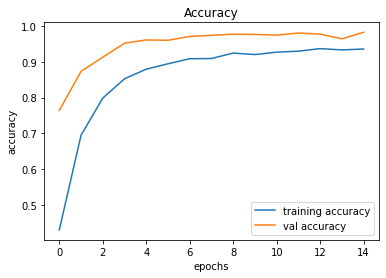

In [ ]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

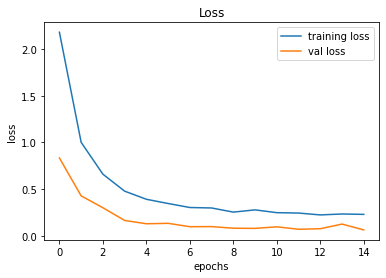

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('./drive/MyDrive/Colab Notebooks/dataset/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open("./drive/MyDrive/Colab Notebooks/dataset/"+img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)

In [17]:
pred_class = []
for i in pred:
    pred_class.append(i.argmax())

In [18]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred_class))

0.9465558194774347


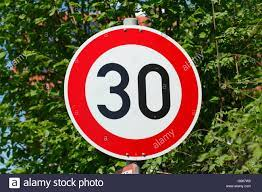

'Speed limit (30km/h)'

In [19]:
from IPython.display import Image as Display,display

def predict(imgpath):
    classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',      
            2:'Speed limit (50km/h)',       
            3:'Speed limit (60km/h)',      
            4:'Speed limit (70km/h)',    
            5:'Speed limit (80km/h)',      
            6:'End of speed limit (80km/h)',     
            7:'Speed limit (100km/h)',    
            8:'Speed limit (120km/h)',     
           9:'No passing',   
           10:'No passing veh over 3.5 tons',     
           11:'Right-of-way at intersection',     
           12:'Priority road',    
           13:'Yield',     
           14:'Stop',       
           15:'No vehicles',       
           16:'Veh > 3.5 tons prohibited',       
           17:'No entry',       
           18:'General caution',     
           19:'Dangerous curve left',      
           20:'Dangerous curve right',   
           21:'Double curve',      
           22:'Bumpy road',     
           23:'Slippery road',       
           24:'Road narrows on the right',  
           25:'Road work',    
           26:'Traffic signals',      
           27:'Pedestrians',     
           28:'Children crossing',     
           29:'Bicycles crossing',       
           30:'Beware of ice/snow',
           31:'Wild animals crossing',      
           32:'End speed + passing limits',      
           33:'Turn right ahead',     
           34:'Turn left ahead',       
           35:'Ahead only',      
           36:'Go straight or right',      
           37:'Go straight or left',      
           38:'Keep right',     
           39:'Keep left',      
           40:'Roundabout mandatory',     
           41:'End of no passing',      
           42:'End no passing veh > 3.5 tons' }
    image = Image.open(imgpath)
    image = image.resize((30,30))
    data=[]
    data.append(np.array(image))
    X_test=np.array(data)
    pred = model.predict(X_test)
    pred_class = []
    for i in pred:
        pred_class.append(i.argmax())
    return classes[pred_class[0]]

imgpath="./drive/MyDrive/Colab Notebooks/dataset/sign.jpg"
display(Display(imgpath))
predict(imgpath)

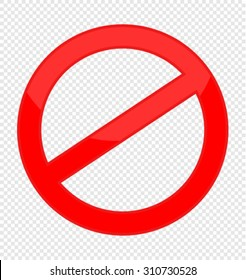

'Veh > 3.5 tons prohibited'

In [20]:
imgpath="./drive/MyDrive/Colab Notebooks/dataset/noEntry.jpg"
display(Display(imgpath))
predict(imgpath)

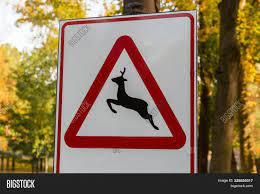

'Wild animals crossing'

In [21]:
imgpath="./drive/MyDrive/Colab Notebooks/dataset/AnimalCrossing.jpg"
display(Display(imgpath))
predict(imgpath)